### Title: Cars Data analysis Real world Project with python




* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)


* #### Github Link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiODBlM2NiOGMtNjZjNS00NGYyLTg2YzUtODE2OWJlYWM1ZWVhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)

#### Introduction


* Different countries manufacture cars of different types and also cars of different engines power and so forth hence in all this it actually helps to determine the prices of the cars given a certain set of variables. This dataset actually contains the information on different cars from different regions as well as their prices, lengths and the different variables that affect the car price.



* The data is a csv file and analysis is done using pandas 
* The data will be saved and exported to power bi for good visualisations
* matplotlib will be used for some data visualisations to get the inisghts of the data

### 1.0 Questions to answer 

These Questions will be answered under phase3: of the data analysis

* How many types of cars are in the dataset
* Which origin has produced many cars
* which model has engine size greater than 2 and yet coasting more than 33 000
* create the columns of normalised Length and Wheelbase
* Find the model of the make by Acura
* increase the mpg_city by 3
* find the relationship between the variables and determines what heavily affect the price
* how does drive train affect the prices of data
* Determine the type by the number of cylinders
* which model cost the most
* which type has the greatest horsepower
* record where the weight of the car is less than 3300
* which type orginates from Asia or Europe
* which regions has given out more SUVs models


These questions have been developed by the arthor to help analyse the data and tell the story about the data

# Phase 1: Data preparation

This step involves data import,it includes import of libraries that facilitate data import, analysis and visualisation.

In [2]:
import pandas as pd               #for data loading and manipulation

import numpy as np                #for stastical analysis

import matplotlib.pyplot as plt        #for data visualisation
import seaborn as sns

import matplotlib
%matplotlib inline 

In [3]:
na_vals = [' ', 'nan', 'Nan', '?', 'missing', 'Missing']      #the list containing all the values that are to be deemed as null values

df = pd.read_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\2. Cars Data1.csv")

#take note of the dataset directory, click on the dataset that needs to be imported and copy path or
#go to properties >> right click on the dataset >> security >> copy the path that shows beneath
#take note, on both cases insert r before the path directory.

#on this following method inputting r doesnt matter
#import the dataset into the jupyter notebook folder you working on and copy the name of the dataset hence insert it in the parentheses

In [4]:
# view first 5 rows of the data

df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [5]:
df['Make'].unique()

array(['Acura', 'Audi', 'BMW', nan, 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [6]:
#check the shape of the data

df.shape

(432, 15)

the dataset has 432 rows and 15 columns

In [7]:
#check all the columns of the dataset
df.columns.to_frame()

,0
Make,Make
Model,Model
Type,Type
Origin,Origin
DriveTrain,DriveTrain
MSRP,MSRP
Invoice,Invoice
EngineSize,EngineSize
Cylinders,Cylinders
Horsepower,Horsepower


In [8]:
#check the total non null values in the dataset
df.count()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

This shows that there are some null values since the previous shape had 432, now 428 this shows that the number of rows have been reduced

# Phase 2: Data Processing

This phase includes all the cleaning, transforming and processing of data

### Step 1: Check for all the the missing or na values in the dataset

In [9]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

There are 4 null values

check for the na values chances are that they are in the same rows

In [10]:
# before dropping check the rows having the null_values chances are that they are in the same row

df.replace({np.nan: 'na_va'}, inplace = True)      # replaces all the np.nan values with 'na_va', inplace = True shows that changes done will affect the whole dataset

filt = (df['Weight'] == 'na_va')                    # filters the rows having the values with 'na_va', that has replaced the np.nan
df[filt]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
30,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va
39,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va
161,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va
173,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va,na_va


as predicted its only on row having all the missing information, this makes it easy to drop

In [11]:
#drop all the null values
df.replace({'na_va': np.nan}, inplace = True)     #reverse the process done above of replacing the np.nan values with na_va
df.dropna(inplace = True)

In [12]:
#check again for the missing values
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

The data has been cleared of the null and missing values

### Step 2: Check for all the data duplicates and remove them


In [13]:
df.duplicated().sum()

0

There is no duplication of data




### Step 3: Check for the datatypes in the dataset to see if there is need to change the datatypes of some columns

In [14]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object



### Step 4: Change the Invoice column data type from string to float

In [15]:
df['Invoice'] = df['Invoice'].str.replace(',', '').str.replace('$', '').astype(float)


C:\Users\Tamie\AppData\Local\Temp\ipykernel_15664\2701088846.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Invoice'] = df['Invoice'].str.replace(',', '').str.replace('$', '').astype(float)


In [16]:
df.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0


In [17]:
#check the datatype again
df['Invoice'].dtypes

dtype('float64')

it has been changed

# Phase 3: Data Analysis

* EDA is an approach to anaylse data inorder to summarize main characteristics of the data
* It also helps to gain better understanding of the dataset
* helps uncover relationships between different variables 
* extract the important variables for the problem being solved

In [18]:
df.head(1)   #gets the tow of the dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0


In [19]:
df['DriveTrain'].value_counts() #gets the counts of unique values of te drive train column

Front    226
Rear     108
All       92
Name: DriveTrain, dtype: int64

#### Q1: How many types of cars are in the dataset

In [75]:
df.count()       #counts the number of rows of the dataset

Make           426
Model          426
Type           426
Origin         426
DriveTrain     426
MSRP           426
Invoice        426
EngineSize     426
Cylinders      426
Horsepower     426
MPG_City       426
MPG_Highway    426
Weight         426
Wheelbase      426
Length         426
dtype: int64

There are 426 cars in the dataset

#### Q2: Which origin has produced many cars

In [76]:
df['Origin'].value_counts()    #gets the counts of unique values of te drive train column

Asia      156
USA       147
Europe    123
Name: Origin, dtype: int64

Asia has more cars manufactured the last being Europe

#### Q3: which model has engine size greater than 2 and yet costing more than 33 000

In [77]:
#view the dataset
df.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0


In [79]:
filt = (df['EngineSize'] > 2) & (df['Invoice'] > 33000)    # setting up the filters from the dataset

df.loc[filt, 'Model']

0                          MDX
4                   3.5 RL 4dr
5      3.5 RL w/Navigation 4dr
6       NSX coupe 2dr manual S
12                  A6 3.0 4dr
                ...           
426               S80 2.5T 4dr
427    C70 LPT convertible 2dr
428    C70 HPT convertible 2dr
429                 S80 T6 4dr
431                       XC70
Name: Model, Length: 125, dtype: object

125 models have the cars with the above specified dimensions

#### Q4: create the columns of normalised Length and Wheelbase

In [80]:
df.head(1)  #view the dataset

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0


In [81]:
df['Wheelbase'].dtypes    #gets the wheelbase column datatype

dtype('float64')

In [82]:
#creating the column length and converting it into dataype interger then divide it by max of the length column
df['Length'] = df['Length'].astype(int)/df['Length'].astype(int).max()
df['Wheelbase'] = df['Wheelbase'].astype(int)/df['Wheelbase'].astype(int).max()

In [83]:
#view the dataset to check on the normlised columns
df.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,0.736111,0.794118


#### Q5: Find the model made by Acura

In [84]:
#view the dataset
df.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,0.736111,0.794118
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,0.701389,0.722689


In [85]:
filt = (df['Make'] == 'Acura')        #filt the dataset, on column make to acura
df[filt].head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,0.736111,0.794118
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,0.701389,0.722689
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,0.729167,0.768908
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,0.750000,0.781513
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,0.798611,0.827731


#### Q6: increase the mpg_city by 3

In [86]:
df['MPG_City'].dtypes    #gets the mpg_city column dataset

dtype('float64')

In [87]:
df['MPG_City_ADD']  = df['MPG_City'] + 3     #creates the new column mpg_city_add then add  3 on the column

#### Q7: find the relationship between the variables and determines what heavily affect the EngineSize

In [20]:
df.corr()  #checks the correlation on the entire dataset 1 being the strong 0 being the least posistive corelatted, the same applies for -1 and 0 in negative coreelation

,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
Invoice,1.000000,0.566019,0.645226,0.824079,-0.471304,-0.435452,0.441916,0.148003,0.165645
EngineSize,0.566019,1.000000,0.908002,0.793250,-0.717860,-0.725901,0.808707,0.638947,0.636015
Cylinders,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.824079,0.793250,0.810341,1.000000,-0.677034,-0.647425,0.631758,0.387561,0.382386
MPG_City,-0.471304,-0.717860,-0.684402,-0.677034,1.000000,0.940993,-0.740418,-0.508029,-0.504184
MPG_Highway,-0.435452,-0.725901,-0.676100,-0.647425,0.940993,1.000000,-0.793615,-0.525457,-0.468756
Weight,0.441916,0.808707,0.742209,0.631758,-0.740418,-0.793615,1.000000,0.760857,0.689168
Wheelbase,0.148003,0.638947,0.546730,0.387561,-0.508029,-0.525457,0.760857,1.000000,0.889838
Length,0.165645,0.636015,0.547783,0.382386,-0.504184,-0.468756,0.689168,0.889838,1.000000


cylinders, horsepower, weight affect it more

#### Q9: Determine the type by the number of cylinders

In [89]:
df.head(1)  #view the dataset head

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG_City_ADD
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,0.736111,0.794118,20.0


In [21]:
df.groupby('Type').EngineSize.max() #gets the type of the cars being groped by their engine size

Type
Hybrid    2.0
SUV       6.8
Sedan     6.0
Sports    8.3
Truck     6.0
Wagon     5.0
Name: EngineSize, dtype: float64

#### Q10: which model cost the most

In [22]:
#group the model by the cost, and values are sorted by the biggest cost giving the first 5 rows
df.groupby('Model').Invoice.max().sort_values(ascending=False).head()

Model
911 GT2 2dr              173560.0
CL600 2dr                119600.0
SL600 convertible 2dr    117854.0
SL55 AMG 2dr             113388.0
CL500 2dr                 88324.0
Name: Invoice, dtype: float64

911 GT2 2dr   costing $173560.0 is the most expensive car

#### Q11: which type has the greatest horsepower

In [23]:
#group the type by horsepower maximum values, sorting the values starting from the largest
df.groupby('Type').Horsepower.max().sort_values(ascending=False)

Type
Sports    500.0
Sedan     493.0
Truck     345.0
SUV       340.0
Wagon     340.0
Hybrid    110.0
Name: Horsepower, dtype: float64

#### Q12: Show all the record where the weight of the car is less than 3300

In [24]:
filt = (df['Weight'] > 3300)    #filters the dataset to be greater than 3300
df[~filt]       #gives out the dataset having less weight of 3300

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765",79978.0,3.2,6.0,290.0,17.0,24.0,3153.0,100.0,174.0
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940",23508.0,1.8,4.0,170.0,22.0,31.0,3252.0,104.0,179.0
21,Audi,TT 1.8 convertible 2dr (coupe),Sports,Europe,Front,"$35,940",32512.0,1.8,4.0,180.0,20.0,28.0,3131.0,95.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Volkswagen,New Beetle GLS convertible 2dr,Sedan,Europe,Front,"$23,215",21689.0,2.0,4.0,115.0,24.0,30.0,3082.0,99.0,161.0
412,Volkswagen,Passat GLS 4dr,Sedan,Europe,Front,"$23,955",21898.0,1.8,4.0,170.0,22.0,31.0,3241.0,106.0,185.0
417,Volkswagen,Jetta GL,Wagon,Europe,Front,"$19,005",17427.0,2.0,4.0,115.0,24.0,30.0,3034.0,99.0,174.0
421,Volvo,S40 4dr,Sedan,Europe,Front,"$25,135",23701.0,1.9,4.0,170.0,22.0,29.0,2767.0,101.0,178.0


#### Q13: which type orginates from Asia or Europe

In [25]:
filt = (df['Origin'] == 'Asia') | (df['Origin'] == 'Europe')   #filters cars that are manufactured by asia and europe
df.loc[filt, 'Type']

0        SUV
1      Sedan
2      Sedan
3      Sedan
4      Sedan
       ...  
427    Sedan
428    Sedan
429    Sedan
430    Wagon
431    Wagon
Name: Type, Length: 279, dtype: object

#### Q14: which regions has given out more SUVs models

In [26]:
filt = (df['Type'] == 'SUV')
df[filt].Origin.max()         #gets the origin of suv cars

'USA'

# Phase 4: Data Visualisation


* The purpose of data visualization is to visually represent data in a way that allows people to quickly and easily understand patterns, relationships, and trends in the data. By creating visual representations of data, we can make complex information more accessible and understandable, which can lead to insights and actionable outcomes.

### 4.1: car types origins

In [39]:

counts = df['Origin'].value_counts()    # Get the value counts of the 'Origin' column



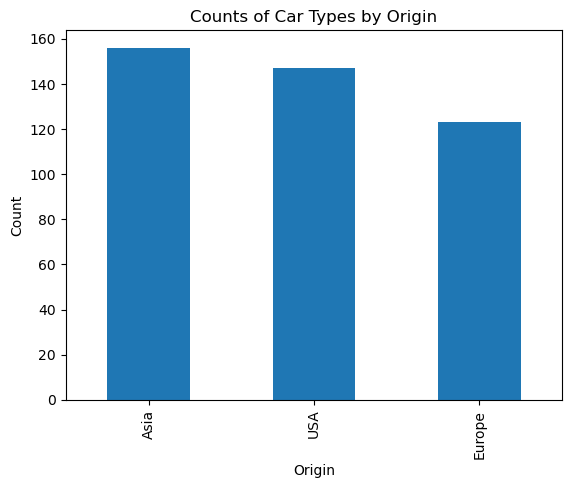

In [41]:

counts.plot(kind='bar')    # Create a bar plot of the counts

#Setting the title and labels for the plot
plt.title('Counts of Car Types by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')

# Show the plot
plt.show()


##### * **key takeaway:** more cars were produced from Asia, followed by USA and the last being Europe

### 4.2: Number of cars in the dataset

In [49]:
# This gets the counts of non-null values in each column
counts = df[['Make', 'Model']].count()

Text(0, 0.5, 'Count')

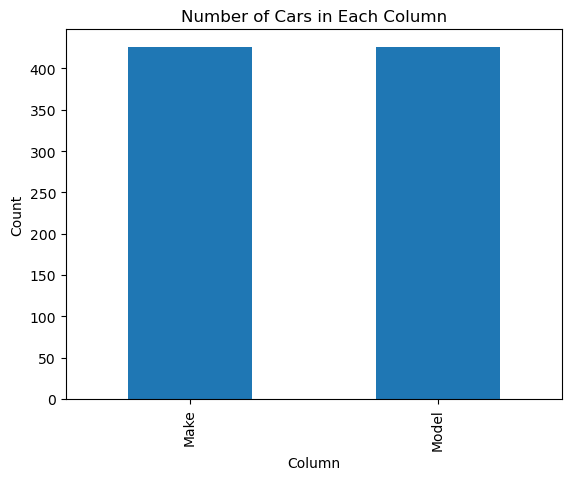

In [50]:
# Create a bar plot of the counts
counts.plot(kind='bar')

# Set the title and labels for the plot
plt.title('Number of Cars in Each Column')
plt.xlabel('Column')
plt.ylabel('Count')

# Show the plot


##### * **key takeaway:** this shows the total cars in the dataset, well there are 450 cars, as the graph show the 2 columns only

### 4.3: Horsepower by type of the car

In [101]:
df.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MPG_City_ADD
0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,0.736111,0.794118,20.0


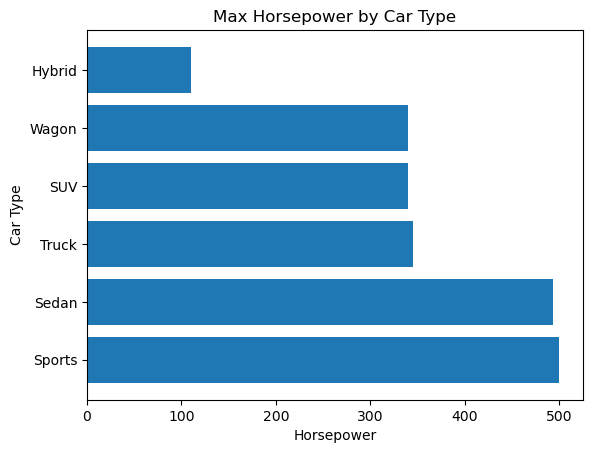

In [102]:
# Group the data by Type and find the max Horsepower for each group
max_hp_by_type = df.groupby('Type').Horsepower.max().sort_values(ascending=False)

# Create a horizontal bar plot of the max Horsepower for each Type
plt.barh(max_hp_by_type.index, max_hp_by_type.values) 


#to explain the above code on max_hp_by_type.index
#max_hp_by_type.index retrieves the index of the Series object, which contains the unique car types (e.g. "SUV", "Sedan", "Truck", etc.). 
#This is used as the x-axis values for the horizontal bar chart created by plt.barh().

#to explain the above code on max_hp_by_type.values
#max_hp_by_type.values retrieves the values of the Series object, which contains the corresponding maximum horsepower 
#values for each car type. This is used as the y-axis values for the horizontal bar chart created by plt.barh().

# Set the title and labels for the plot
plt.title('Max Horsepower by Car Type')
plt.xlabel('Horsepower')
plt.ylabel('Car Type')

# Show the plot
plt.show()

##### * **key takeaway:**  Upon the car types given, Sports car type has the most high horsepower, while Sedan follows, the last being hybrid

### 4.4: Top 5 Car models by max Invoice

<function matplotlib.pyplot.show(close=None, block=None)>

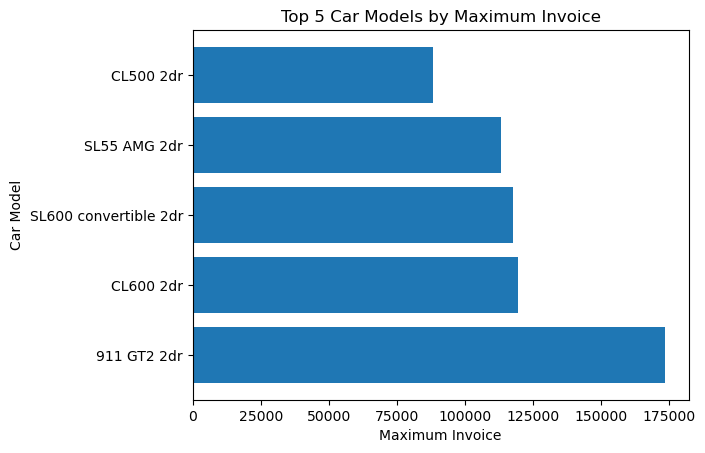

In [103]:
# Group the data by car model, get the maximum invoice for each model, and sort by descending order
max_invoice_by_model = df.groupby('Model').Invoice.max().sort_values(ascending=False).head()

# Create a horizontal bar chart to display the data
plt.barh(max_invoice_by_model.index, max_invoice_by_model.values)

# Add chart labels and title
plt.xlabel('Maximum Invoice')
plt.ylabel('Car Model')
plt.title('Top 5 Car Models by Maximum Invoice')

plt.show

##### * **key takeaway:**  911 GT2 2dr model is the most expensive car as CL 500 car mode is the last on the top 5 cars chosen

### 4.5: Max Engine Size by car type

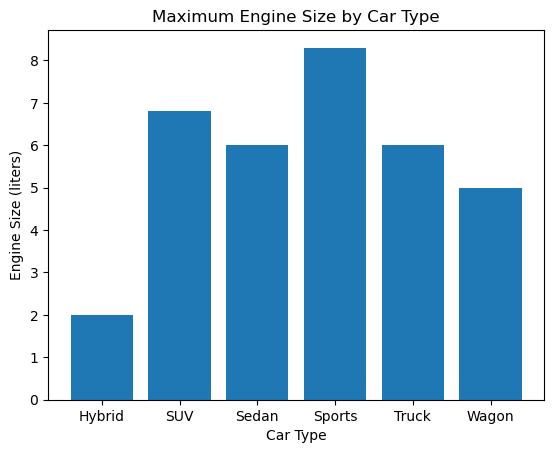

In [99]:
# Group the data by car type and calculate the maximum engine size
max_engine_by_type = df.groupby('Type').EngineSize.max()

# Create a bar chart to visualize the maximum engine size for each car type
plt.bar(max_engine_by_type.index, max_engine_by_type.values)

# Set the chart title and axis labels
plt.title('Maximum Engine Size by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Engine Size (liters)')

# Display the chart
plt.show()

##### * **key takeaway:**  Sports car type has the most engine size the least being hybrid

### 4.6: Comparison between cars from asia and europe

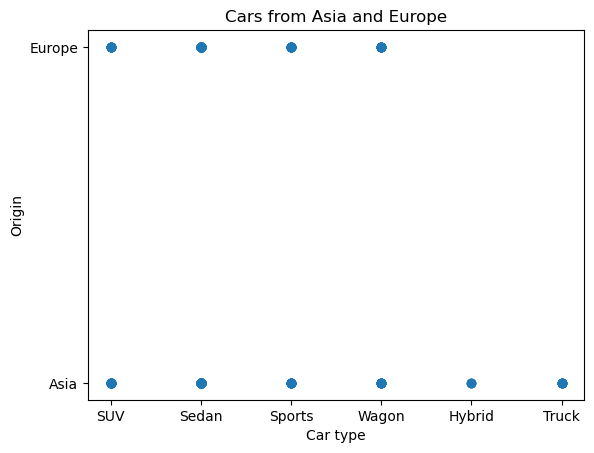

In [100]:
filt = (df['Origin'] == 'Asia') | (df['Origin'] == 'Europe')
filtered_df = df.loc[filt, :]

# Create the plot
plt.scatter(filtered_df['Type'], filtered_df['Origin'])
plt.title('Cars from Asia and Europe')
plt.xlabel('Car type')
plt.ylabel('Origin')
plt.show()

##### * **key takeaway:**  graph shows that more cars types are coming from Asia and Europe

In [28]:
#saving the dataset for more vizualisation
df.to_csv(r"C:\Users\Tamie\Downloads\python data science projects\datasets\cleaned Cars")

#### Further data Visualization was done in powerbi: [Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiODBlM2NiOGMtNjZjNS00NGYyLTg2YzUtODE2OWJlYWM1ZWVhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)


## Author: TamiriraIshe Nyevera

## Date: 3 January 2023

* #### LinkedIn profile Link: [My LinkedIn Profile](https://www.linkedin.com/in/tamiriraishe-nyevera-2b51671b5/)

* #### Github link:[Github profile](https://github.com/Tamie-AI-Tech)

* #### Kaggle Link: [Kaggle Profile](https://www.kaggle.com/tamiriraishenyevera)

* #### PowerBI visualisation imbedded code:[Power data Viz link](https://app.powerbi.com/view?r=eyJrIjoiODBlM2NiOGMtNjZjNS00NGYyLTg2YzUtODE2OWJlYWM1ZWVhIiwidCI6IjQ0ZGJiOWQ3LTM3N2QtNDBkZS1hZGI4LTYzNTlkYWQ4MTBiZiJ9)